## Tahap 1: Pra-Pemrosesan Data Pemain Sepak Bola

Tujuan: melakukan pembersihan data, seleksi fitur, dan transformasi posisi pemain untuk persiapan pemodelan machine learning

Output: file CSV bernama clean_data.csv


#### 1.1. Impor Library dan Memuat Data

In [ ]:
# Import library yang akan digunakan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Memuat dataset
df = pd.read_csv(r"D:\soccer_position\data\raw\male_players_22.csv")
df

C:\Users\faust\AppData\Local\Temp\ipykernel_4304\3930415496.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"D:\soccer_position\data\raw\male_players_22.csv")


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,261962,https://sofifa.com/player/261962/defu-song/220002,Song Defu,宋德福,CDM,47,52,70000.0,1000.0,22,...,46+2,46+2,46+2,48+2,15+2,https://cdn.sofifa.net/players/261/962/22_120.png,https://cdn.sofifa.net/teams/112541/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
19235,262040,https://sofifa.com/player/262040/caoimhin-port...,C. Porter,Caoimhin Porter,CM,47,59,110000.0,500.0,19,...,44+2,44+2,44+2,48+2,14+2,https://cdn.sofifa.net/players/262/040/22_120.png,https://cdn.sofifa.net/teams/445/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19236,262760,https://sofifa.com/player/262760/nathan-logue/...,N. Logue,Nathan Logue-Cunningham,CM,47,55,100000.0,500.0,21,...,45+2,45+2,45+2,47+2,12+2,https://cdn.sofifa.net/players/262/760/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19237,262820,https://sofifa.com/player/262820/luke-rudden/2...,L. Rudden,Luke Rudden,ST,47,60,110000.0,500.0,19,...,26+2,26+2,26+2,32+2,15+2,https://cdn.sofifa.net/players/262/820/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png


#### 1.2. Eksplorasi Data Awal

In [32]:
# Melihat informasi dataset
print(df.info())

# Mengecek kolom yang ada dalam dataset
print(df.columns)

# Mengecek jumlah nilai kosong per kolom di dataset
df.isnull().sum().sort_values(ascending=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Columns: 110 entries, sofifa_id to nation_flag_url
dtypes: float64(16), int64(44), object(50)
memory usage: 16.1+ MB
None
Index(['sofifa_id', 'player_url', 'short_name', 'long_name',
       'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur',
       'age',
       ...
       'lcb', 'cb', 'rcb', 'rb', 'gk', 'player_face_url', 'club_logo_url',
       'club_flag_url', 'nation_logo_url', 'nation_flag_url'],
      dtype='object', length=110)


nation_jersey_number    18480
nation_team_id          18480
nation_position         18480
nation_logo_url         18480
club_loaned_from        18137
                        ...  
rcb                         0
player_face_url             0
gk                          0
rb                          0
nation_flag_url             0
Length: 110, dtype: int64

#### 1.3. Seleksi Fitur yang Relevan

In [33]:
# Kolom - kolom yang digunakan untuk analisis model
selected_columns = [
    'short_name', 'player_positions', 'overall', 'age', 'height_cm', 'weight_kg',
    'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy',
    'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
    'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
    'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
    'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping',
    'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression',
    'mentality_interceptions', 'mentality_positioning', 'mentality_vision',
    'mentality_penalties', 'mentality_composure', 'defending_marking_awareness',
    'defending_standing_tackle', 'defending_sliding_tackle'
]

# Membuat dataframe untuk kolom yang terpilih
df_selected = df[selected_columns].copy()
df_selected

,short_name,player_positions,overall,age,height_cm,weight_kg,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,...,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle
0,L. Messi,"RW, ST, CF",93,34,170,72,85,95,70,91,...,94,44,40,93,95,75,96,20,35,24
1,R. Lewandowski,ST,92,32,185,81,71,95,90,85,...,87,81,49,95,81,90,88,35,42,19
2,Cristiano Ronaldo,"ST, LW",91,36,187,83,87,95,90,80,...,93,63,29,95,76,88,95,24,32,24
3,Neymar Jr,"LW, CAM",91,29,175,68,85,83,63,86,...,81,63,37,86,90,93,93,35,32,29
4,K. De Bruyne,"CM, CAM",91,30,181,70,94,82,55,94,...,91,76,66,88,94,83,89,68,65,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,Song Defu,CDM,47,22,180,64,46,32,48,50,...,30,52,42,38,43,42,37,38,43,48
19235,C. Porter,CM,47,19,175,70,54,33,46,51,...,38,49,39,51,49,44,47,37,44,47
19236,N. Logue,CM,47,21,178,72,39,32,43,49,...,34,51,38,45,46,39,36,38,44,48
19237,L. Rudden,ST,47,19,173,66,29,49,40,38,...,41,34,14,47,40,49,47,10,14,11


#### 1.4. Pembersihan dan Transformasi Posisi

In [35]:
# Membuag pemain dengan posisi kiper (GF)
df_no_gk = df_selected[df_selected['player_positions'] != 'GK'].copy()

# Fungsi untuk menyederhanakan posisi
def position(player_position):
    # Mengambil posisi pertama jika seorang pemain punya banyak posisi 
    pos = player_position.split(',')[0]

    # Mengelompokkan ke Penyerang
    if pos in ['ST', 'LW', 'RW', 'CF', 'LS', 'RS', 'LF', 'RF']:
        return 'Penyerang'
    # Mengelompokkan ke Gelandang
    elif pos in ['CM', 'CDM', 'CAM', 'LM', 'RM', 'LCM', 'RCM', 'LDM', 'RDM', 'LAM', 'RAM']:
        return 'Gelandang'
    # Mengelompokkan ke Bek
    elif pos in ['CB', 'LB', 'RB', 'LWB', 'RWB', 'LCB', 'RCB']:
        return 'Bek'
    # Posisi lainnya akan diberi none (dibuang hihihi)
    else:
        return None

# Membuat kolom baru posisi yang sudah disederhanain
df_no_gk['simple_position'] = df_no_gk['player_positions'].apply(position)

# Membuang baris none
df_cleaned = df_no_gk.dropna(subset=['simple_position']).copy()

display(df_cleaned)

,short_name,player_positions,overall,age,height_cm,weight_kg,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,...,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,simple_position
0,L. Messi,"RW, ST, CF",93,34,170,72,85,95,70,91,...,44,40,93,95,75,96,20,35,24,Penyerang
1,R. Lewandowski,ST,92,32,185,81,71,95,90,85,...,81,49,95,81,90,88,35,42,19,Penyerang
2,Cristiano Ronaldo,"ST, LW",91,36,187,83,87,95,90,80,...,63,29,95,76,88,95,24,32,24,Penyerang
3,Neymar Jr,"LW, CAM",91,29,175,68,85,83,63,86,...,63,37,86,90,93,93,35,32,29,Penyerang
4,K. De Bruyne,"CM, CAM",91,30,181,70,94,82,55,94,...,76,66,88,94,83,89,68,65,53,Gelandang
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,Song Defu,CDM,47,22,180,64,46,32,48,50,...,52,42,38,43,42,37,38,43,48,Gelandang
19235,C. Porter,CM,47,19,175,70,54,33,46,51,...,49,39,51,49,44,47,37,44,47,Gelandang
19236,N. Logue,CM,47,21,178,72,39,32,43,49,...,51,38,45,46,39,36,38,44,48,Gelandang
19237,L. Rudden,ST,47,19,173,66,29,49,40,38,...,34,14,47,40,49,47,10,14,11,Penyerang


#### 1.5. Visualisasi Data Bersih


Jumlah pemain per posisi utama:


simple_position
Gelandang    7033
Bek          6394
Penyerang    3680
Name: count, dtype: int64

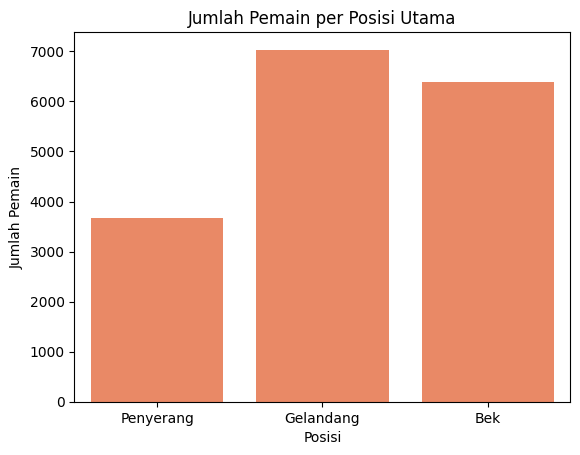

In [41]:
# Menghitung jumlah pemain di setiap kategori posisi baru
print("\nJumlah pemain per posisi utama:")
display(df_cleaned["simple_position"].value_counts())

# Visualisasi penyebaran jumlah posisi
sns.countplot(x='simple_position', data=df_cleaned, color="coral")
plt.title('Jumlah Pemain per Posisi Utama')
plt.xlabel('Posisi')
plt.ylabel('Jumlah Pemain')
plt.show()


#### 1.6. Menyimpan Hasil Akhir 

In [ ]:
df_cleaned.to_csv(r'D:\soccer_position\data\process\clean_data.csv', index=False)